In [1]:
%matplotlib inline
import os
os.chdir('../../util/')

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [thetas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
m          0.824  0.381   0.000    1.000      0.007    0.005    3107.0   
thetas[0]  0.322  0.138   0.072    0.564      0.003    0.002    2870.0   
thetas[1]  0.691  0.105   0.489    0.875      0.002    0.001    2577.0   
theta      0.647  0.136   0.377    0.864      0.002    0.002    3561.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
m          3107.0    3107.0    3107.0    1.0  
thetas[0]  2659.0    3000.0    2727.0    1.0  
thetas[1]  2577.0    2576.0    2216.0    1.0  
theta      3561.0    3661.0    2946.0    1.0  


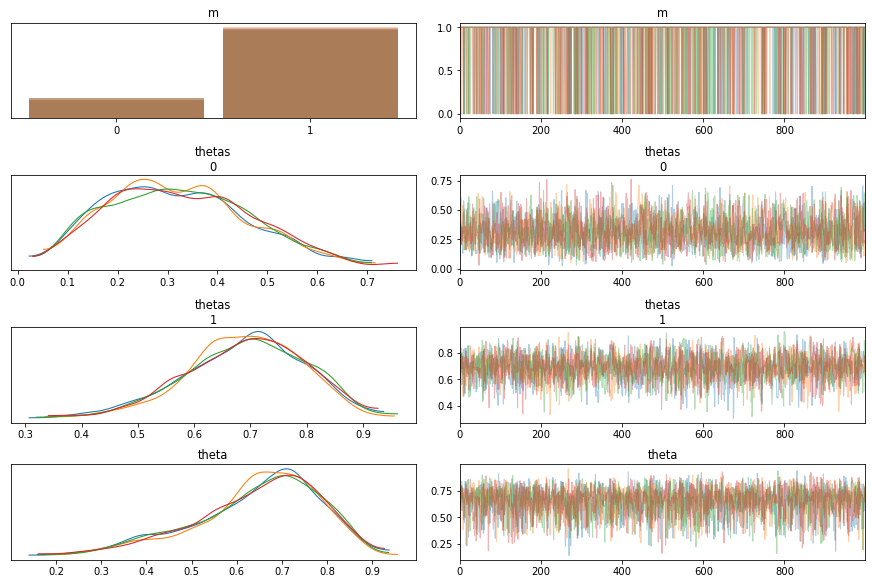

In [2]:
import jags_ydich_xnom1subj_mbernbetamodelcomp

In [3]:
import jags_ydich_xnom1subj_mbernbetamodelcomppseudoprior